In [48]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math
import numpy as np
from scipy import stats
import math
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import sys
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [49]:
#Read block group geometry
bg = gpd.read_file('../../raw-data/seattle-block-group-geometry/Census_Block_Groups_2010/Census_Block_Groups_2010.shp')
bg.head()

,OBJECTID,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area,geometry
0,1,000100,1,530330001001,Block Group 1,+47.7276870,-122.2815160,100,100.10000,100.1,588.28300,221.04120,367.28558,NaN,21168.91854,25625607.58123,"POLYGON ((-122.26840 47.72641, -122.26719 47.7..."
1,2,000100,2,530330001002,Block Group 2,+47.7293165,-122.2924690,100,100.20000,100.2,71.25803,71.26322,0.00000,NaN,8692.08919,3103999.78057,"POLYGON ((-122.28970 47.73193, -122.28965 47.7..."
2,3,000100,3,530330001003,Block Group 3,+47.7228093,-122.2894558,100,100.30000,100.3,91.60463,91.61135,0.00000,NaN,8560.64577,3990297.62616,"POLYGON ((-122.28633 47.72093, -122.28629 47.7..."
3,4,000100,4,530330001004,Block Group 4,+47.7319367,-122.2944531,100,100.40000,100.4,31.23724,31.23931,0.00000,NaN,4693.43961,1360694.38734,"POLYGON ((-122.29237 47.73194, -122.29231 47.7..."
4,5,000100,5,530330001005,Block Group 5,+47.7229283,-122.2944374,100,100.50000,100.5,56.95655,56.96076,0.00000,NaN,7450.75925,2481027.13537,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."


In [88]:
#read in sidewalk score data
access_score_per_sidewalk = gpd.read_file('../../json-for-publishing/access-score/access-score-per-sidewalk.geojson')

In [89]:
access_score_per_bg = access_score_per_sidewalk.sjoin(bg, op="within")
access_score_per_bg.head()

,sidewalk_id,curb_ramp_avg_score,curb_ramp_count,no_curb_ramp_avg_score,no_curb_ramp_count,no_sidewalk_avg_score,no_sidewalk_count,obstacle_avg_score,obstacle_count,surface_problem_avg_score,surface_problem_count,total_score,geometry,index_right,OBJECTID,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area
0,1,-0.10000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.10000,"LINESTRING (-122.32182 47.60587, -122.32237 47...",299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.20000,8500.2,40.92471,40.92658,0.00000,NaN,6954.00965,1782680.27631
1,2,-0.05000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.05000,"LINESTRING (-122.32138 47.60504, -122.32193 47...",299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.20000,8500.2,40.92471,40.92658,0.00000,NaN,6954.00965,1782680.27631
2,3,-0.10000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.10000,"LINESTRING (-122.32115 47.60513, -122.32170 47...",299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.20000,8500.2,40.92471,40.92658,0.00000,NaN,6954.00965,1782680.27631
3,4,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,"LINESTRING (-122.32087 47.60450, -122.32125 47...",299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.20000,8500.2,40.92471,40.92658,0.00000,NaN,6954.00965,1782680.27631
4,5,-0.10000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.10000,"LINESTRING (-122.32084 47.60480, -122.32110 47...",299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.20000,8500.2,40.92471,40.92658,0.00000,NaN,6954.00965,1782680.27631


In [90]:
#select the first 12 columns and column 18
access_score_per_bg = access_score_per_bg.iloc[:, np.r_[0:12, 17]]
#put the last column to the first
access_score_per_bg = access_score_per_bg[access_score_per_bg.columns[::-1]]
access_score_per_bg.head()


,GEOID10,total_score,surface_problem_count,surface_problem_avg_score,obstacle_count,obstacle_avg_score,no_sidewalk_count,no_sidewalk_avg_score,no_curb_ramp_count,no_curb_ramp_avg_score,curb_ramp_count,curb_ramp_avg_score,sidewalk_id
0,530330085002,-0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,-0.10000,1
1,530330085002,-0.05000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,-0.05000,2
2,530330085002,-0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-0.10000,3
3,530330085002,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,4
4,530330085002,-0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-0.10000,5


In [91]:
#grouby block group and calculate the mean
access_score_per_bg_mean = access_score_per_bg.groupby('GEOID10').mean()
#select the columns that does not contain the word count
access_score_per_bg_mean = access_score_per_bg_mean.loc[:, ~access_score_per_bg_mean.columns.str.contains('count')]
#drop sidewalk_id column
access_score_per_bg_mean = access_score_per_bg_mean.drop(columns=['sidewalk_id'])
access_score_per_bg_mean

,total_score,surface_problem_avg_score,obstacle_avg_score,no_sidewalk_avg_score,no_curb_ramp_avg_score,curb_ramp_avg_score
GEOID10,,,,,,
530330001005,-0.02500,0.00000,0.00000,0.00000,0.00000,-0.02500
530330002002,-0.13571,-0.04286,0.00000,0.00000,-0.07143,-0.02143
530330004012,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000
530330004023,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000
530330004024,-0.12000,-0.06000,-0.03000,0.00000,0.00000,-0.03000
...,...,...,...,...,...,...
530330118003,-0.09286,0.00000,0.00000,0.00000,-0.07143,-0.02143
530330118004,-0.48950,-0.11732,-0.15391,-0.32609,-0.01087,-0.05326
530330118005,-0.63871,-0.12621,-0.13548,-0.41935,-0.04032,-0.06371


In [92]:
#groupby block group and calculate the sum
access_score_per_bg_sum = access_score_per_bg.groupby('GEOID10').sum()
#select the columns that contain the word count
access_score_per_bg_sum = access_score_per_bg_sum.loc[:, access_score_per_bg_sum.columns.str.contains('count')]
access_score_per_bg_sum

,surface_problem_count,obstacle_count,no_sidewalk_count,no_curb_ramp_count,curb_ramp_count
GEOID10,,,,,
530330001005,0.00000,0.00000,0.00000,0.00000,5.00000
530330002002,1.00000,0.00000,0.00000,1.00000,7.00000
530330004012,0.00000,0.00000,16.00000,0.00000,0.00000
530330004023,0.00000,0.00000,1.00000,0.00000,0.00000
530330004024,3.00000,3.00000,0.00000,0.00000,10.00000
...,...,...,...,...,...
530330118003,0.00000,0.00000,0.00000,1.00000,7.00000
530330118004,32.00000,25.00000,31.00000,1.00000,66.00000
530330118005,29.00000,13.00000,88.00000,6.00000,55.00000


In [94]:
#merge the two dataframes together
access_score_per_bg_grouped = pd.merge(access_score_per_bg_mean, access_score_per_bg_sum, on='GEOID10').reset_index()
access_score_per_bg_grouped .head()

,GEOID10,total_score,surface_problem_avg_score,obstacle_avg_score,no_sidewalk_avg_score,no_curb_ramp_avg_score,curb_ramp_avg_score,surface_problem_count,obstacle_count,no_sidewalk_count,no_curb_ramp_count,curb_ramp_count
0,530330001005,-0.02500,0.00000,0.00000,0.00000,0.00000,-0.02500,0.00000,0.00000,0.00000,0.00000,5.00000
1,530330002002,-0.13571,-0.04286,0.00000,0.00000,-0.07143,-0.02143,1.00000,0.00000,0.00000,1.00000,7.00000
2,530330004012,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,16.00000,0.00000,0.00000
3,530330004023,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,530330004024,-0.12000,-0.06000,-0.03000,0.00000,0.00000,-0.03000,3.00000,3.00000,0.00000,0.00000,10.00000


In [95]:
access_score_per_bg_grouped

,GEOID10,total_score,surface_problem_avg_score,obstacle_avg_score,no_sidewalk_avg_score,no_curb_ramp_avg_score,curb_ramp_avg_score,surface_problem_count,obstacle_count,no_sidewalk_count,no_curb_ramp_count,curb_ramp_count
0,530330001005,-0.02500,0.00000,0.00000,0.00000,0.00000,-0.02500,0.00000,0.00000,0.00000,0.00000,5.00000
1,530330002002,-0.13571,-0.04286,0.00000,0.00000,-0.07143,-0.02143,1.00000,0.00000,0.00000,1.00000,7.00000
2,530330004012,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,16.00000,0.00000,0.00000
3,530330004023,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,530330004024,-0.12000,-0.06000,-0.03000,0.00000,0.00000,-0.03000,3.00000,3.00000,0.00000,0.00000,10.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
398,530330118003,-0.09286,0.00000,0.00000,0.00000,-0.07143,-0.02143,0.00000,0.00000,0.00000,1.00000,7.00000
399,530330118004,-0.48950,-0.11732,-0.15391,-0.32609,-0.01087,-0.05326,32.00000,25.00000,31.00000,1.00000,66.00000
400,530330118005,-0.63871,-0.12621,-0.13548,-0.41935,-0.04032,-0.06371,29.00000,13.00000,88.00000,6.00000,55.00000
401,530330118006,-0.54941,-0.16265,-0.14084,-0.22353,-0.06471,-0.07706,58.00000,29.00000,45.00000,12.00000,78.00000


In [96]:
#get geometry for each block group
access_score_per_bg_grouped = access_score_per_bg_grouped.merge(bg[['GEOID10', 'geometry']], on='GEOID10', how='left')
access_score_per_bg_grouped

,GEOID10,total_score,surface_problem_avg_score,obstacle_avg_score,no_sidewalk_avg_score,no_curb_ramp_avg_score,curb_ramp_avg_score,surface_problem_count,obstacle_count,no_sidewalk_count,no_curb_ramp_count,curb_ramp_count,geometry
0,530330001005,-0.02500,0.00000,0.00000,0.00000,0.00000,-0.02500,0.00000,0.00000,0.00000,0.00000,5.00000,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."
1,530330002002,-0.13571,-0.04286,0.00000,0.00000,-0.07143,-0.02143,1.00000,0.00000,0.00000,1.00000,7.00000,"POLYGON ((-122.29914 47.72473, -122.29912 47.7..."
2,530330004012,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,16.00000,0.00000,0.00000,"POLYGON ((-122.35555 47.72550, -122.35555 47.7..."
3,530330004023,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,"POLYGON ((-122.35023 47.71415, -122.35021 47.7..."
4,530330004024,-0.12000,-0.06000,-0.03000,0.00000,0.00000,-0.03000,3.00000,3.00000,0.00000,0.00000,10.00000,"POLYGON ((-122.35029 47.71777, -122.35026 47.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,530330118003,-0.09286,0.00000,0.00000,0.00000,-0.07143,-0.02143,0.00000,0.00000,0.00000,1.00000,7.00000,"POLYGON ((-122.26158 47.52026, -122.26160 47.5..."
399,530330118004,-0.48950,-0.11732,-0.15391,-0.32609,-0.01087,-0.05326,32.00000,25.00000,31.00000,1.00000,66.00000,"POLYGON ((-122.27131 47.52613, -122.27015 47.5..."
400,530330118005,-0.63871,-0.12621,-0.13548,-0.41935,-0.04032,-0.06371,29.00000,13.00000,88.00000,6.00000,55.00000,"POLYGON ((-122.27177 47.52911, -122.27080 47.5..."
401,530330118006,-0.54941,-0.16265,-0.14084,-0.22353,-0.06471,-0.07706,58.00000,29.00000,45.00000,12.00000,78.00000,"POLYGON ((-122.26880 47.53166, -122.26817 47.5..."


In [97]:
#change access_score_per_bg_grouped to geodataframe
access_score_per_bg_grouped = gpd.GeoDataFrame(access_score_per_bg_grouped, geometry='geometry')
access_score_per_bg_grouped

,GEOID10,total_score,surface_problem_avg_score,obstacle_avg_score,no_sidewalk_avg_score,no_curb_ramp_avg_score,curb_ramp_avg_score,surface_problem_count,obstacle_count,no_sidewalk_count,no_curb_ramp_count,curb_ramp_count,geometry
0,530330001005,-0.02500,0.00000,0.00000,0.00000,0.00000,-0.02500,0.00000,0.00000,0.00000,0.00000,5.00000,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."
1,530330002002,-0.13571,-0.04286,0.00000,0.00000,-0.07143,-0.02143,1.00000,0.00000,0.00000,1.00000,7.00000,"POLYGON ((-122.29914 47.72473, -122.29912 47.7..."
2,530330004012,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,16.00000,0.00000,0.00000,"POLYGON ((-122.35555 47.72550, -122.35555 47.7..."
3,530330004023,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,"POLYGON ((-122.35023 47.71415, -122.35021 47.7..."
4,530330004024,-0.12000,-0.06000,-0.03000,0.00000,0.00000,-0.03000,3.00000,3.00000,0.00000,0.00000,10.00000,"POLYGON ((-122.35029 47.71777, -122.35026 47.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,530330118003,-0.09286,0.00000,0.00000,0.00000,-0.07143,-0.02143,0.00000,0.00000,0.00000,1.00000,7.00000,"POLYGON ((-122.26158 47.52026, -122.26160 47.5..."
399,530330118004,-0.48950,-0.11732,-0.15391,-0.32609,-0.01087,-0.05326,32.00000,25.00000,31.00000,1.00000,66.00000,"POLYGON ((-122.27131 47.52613, -122.27015 47.5..."
400,530330118005,-0.63871,-0.12621,-0.13548,-0.41935,-0.04032,-0.06371,29.00000,13.00000,88.00000,6.00000,55.00000,"POLYGON ((-122.27177 47.52911, -122.27080 47.5..."
401,530330118006,-0.54941,-0.16265,-0.14084,-0.22353,-0.06471,-0.07706,58.00000,29.00000,45.00000,12.00000,78.00000,"POLYGON ((-122.26880 47.53166, -122.26817 47.5..."


In [98]:
# #export to geojson
# access_score_per_bg_grouped.to_file('../../json-for-publishing/access-score/access-score-per-blockgroup.geojson', driver='GeoJSON')

In [10]:
# map = access_score_per_bg_grouped.explore(tiles='cartodbpositron', column='total_score', cmap='RdYlGn', scheme='natural_breaks', k=8)
# map.save('access_score_per_bg.html')

In [102]:
#read in socio-economic data
social_factors = pd.read_csv('../../raw-data/socio-economic-data/socio-economic-factors_20220905.csv')

In [103]:
social_factors = social_factors.rename(columns={'Geo_FIPS': 'GEOID10'})
social_factors.head()

,GEOID10,Population Density (Per Sq. Mile),White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%,Racial Diversity,Citizenship - Native%,Foreign Born - Naturalized%,Foreign Born - Not a Citizen%,Family Households%,Average Household Size,Less than High School%,High School Graduate%,Some College%,Bachelors Degree%,Masters Degree%,Professional School Degree%,Doctorate Degree%,Unemployed%,Median Household Income (In 2019 Inflation Adjusted Dollars),Average Household Income (In 2019 Inflation Adjusted Dollars),Median Family Income (In 2019 Inflation Adjusted Dollars),Average Family Income (In 2019 Inflation Adjusted Dollars),Per Capita Income (In 2019 Inflation Adjusted Dollars),Owner Occupied%,Renter Occupied%,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%,Median Value,Median Gross Rent,Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars),Average Gross Rent for Renter-Occupied Housing Units,2014 or Later%,2010 to 2013%,2000 to 2009%,1990 to 1999%,1980 to 1989%,1970 to 1979%,1960 to 1969%,1950 to 1959%,1940 to 1949%,1939 or Earlier%,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%
0,530330001001.00000,3708.99200,0.85324,0.00000,0.01249,0.08119,0.00000,0.00000,0.05308,0.73758,0.75516,0.09697,0.14787,0.77432,2.49000,0.00000,0.08101,0.18343,0.34358,0.13222,0.17877,0.08101,0.02281,206400.00000,258515.36965,216667.00000,300456.28141,104882.00000,0.90661,0.09339,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,798900.00000,1914.00000,32.40000,1991.66667,0.02724,0.00000,0.06031,0.03891,0.06420,0.07004,0.20817,0.19455,0.18482,0.15175,0.68673,0.64742,0.03931,0.04054,0.00000,0.08722,0.00000,0.01474,0.05630,0.28148,0.37630,0.16000,0.09778,0.02815
1,530330001002.00000,14342.32000,0.50094,0.19286,0.00000,0.14903,0.00000,0.01879,0.13838,0.32985,0.75622,0.09738,0.14641,0.48919,2.14000,0.12966,0.13043,0.38432,0.18556,0.09161,0.07842,0.00000,0.08854,50714.00000,60121.48649,49583.00000,75180.93923,28358.00000,0.13784,0.86216,0.13409,0.05341,0.00000,0.07955,0.00000,0.01705,0.19091,0.52500,603800.00000,1423.00000,35.20000,1426.17555,0.07027,0.17027,0.03108,0.31351,0.16622,0.04730,0.06081,0.01892,0.06757,0.05405,0.61519,0.53549,0.07970,0.32130,0.00000,0.00000,0.02242,0.00000,0.04805,0.23247,0.19610,0.29870,0.15584,0.04286
2,530330001003.00000,10101.80000,0.60097,0.06086,0.00000,0.21508,0.00000,0.05048,0.07261,0.41895,0.75523,0.09702,0.14775,0.43062,2.05000,0.03497,0.15690,0.28450,0.29112,0.09830,0.09168,0.04253,0.01828,51397.00000,79918.31187,115508.00000,111739.20266,39294.00000,0.38627,0.61373,0.37307,0.04769,0.01543,0.01543,0.03506,0.02525,0.10098,0.38710,554900.00000,445.00000,26.80000,691.37529,0.01860,0.07010,0.15880,0.06438,0.13877,0.13019,0.21316,0.02718,0.10157,0.07725,0.64628,0.52527,0.12101,0.27128,0.00000,0.02660,0.05585,0.00000,0.06383,0.09309,0.32048,0.22074,0.26995,0.00133
3,530330001004.00000,51934.57000,0.35661,0.37594,0.00394,0.10493,0.00000,0.02091,0.13767,0.29891,0.75597,0.09610,0.14793,0.41774,2.04000,0.10406,0.23868,0.22222,0.30864,0.09759,0.01705,0.01176,0.08967,42150.00000,54727.82258,41750.00000,57814.47876,26804.00000,0.07742,0.92258,0.01431,0.01732,0.00000,0.02334,0.04217,0.26205,0.24322,0.39759,212200.00000,1333.00000,32.20000,1327.88462,0.21613,0.14597,0.05242,0.03306,0.12742,0.26774,0.04355,0.04919,0.00000,0.06452,0.67199,0.57002,0.10198,0.24962,0.00000,0.04033,0.00000,0.00000,0.05696,0.14478,0.29905,0.17563,0.21203,0.07753
4,530330001005.00000,15089.69000,0.64855,0.03500,0.00968,0.21072,0.00000,0.08637,0.00968,0.47389,0.75568,0.09628,0.14805,0.37967,1.72000,0.20287,0.21531,0.23349,0.21244,0.10813,0.00000,0.02775,0.11345,47292.00000,58352

In [104]:
#change GEOID10 to floar in access_score_per_bg_grouped
access_score_per_bg_grouped['GEOID10'] = access_score_per_bg_grouped['GEOID10'].astype(float)

In [105]:
#merge access_score_per_bg_grouped and social_factors on GEOID10
access_score_per_bg_grouped = access_score_per_bg_grouped.merge(social_factors, on='GEOID10', how='left')
access_score_per_bg_grouped.head()

,GEOID10,total_score,surface_problem_avg_score,obstacle_avg_score,no_sidewalk_avg_score,no_curb_ramp_avg_score,curb_ramp_avg_score,surface_problem_count,obstacle_count,no_sidewalk_count,no_curb_ramp_count,curb_ramp_count,geometry,Population Density (Per Sq. Mile),White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%,Racial Diversity,Citizenship - Native%,Foreign Born - Naturalized%,Foreign Born - Not a Citizen%,Family Households%,Average Household Size,Less than High School%,High School Graduate%,Some College%,Bachelors Degree%,Masters Degree%,Professional School Degree%,Doctorate Degree%,Unemployed%,Median Household Income (In 2019 Inflation Adjusted Dollars),Average Household Income (In 2019 Inflation Adjusted Dollars),Median Family Income (In 2019 Inflation Adjusted Dollars),Average Family Income (In 2019 Inflation Adjusted Dollars),Per Capita Income (In 2019 Inflation Adjusted Dollars),Owner Occupied%,Renter Occupied%,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%,Median Value,Median Gross Rent,Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars),Average Gross Rent for Renter-Occupied Housing Units,2014 or Later%,2010 to 2013%,2000 to 2009%,1990 to 1999%,1980 to 1989%,1970 to 1979%,1960 to 1969%,1950 to 1959%,1940 to 1949%,1939 or Earlier%,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%
0,530330001005.00000,-0.02500,0.00000,0.00000,0.00000,0.00000,-0.02500,0.00000,0.00000,0.00000,0.00000,5.00000,"POLYGON ((-122.29273 47.72019, -122.29273 47.7...",15089.69000,0.64855,0.03500,0.00968,0.21072,0.00000,0.08637,0.00968,0.47389,0.75568,0.09628,0.14805,0.37967,1.72000,0.20287,0.21531,0.23349,0.21244,0.10813,0.00000,0.02775,0.11345,47292.00000,58352.38095,85136.00000,86853.55932,34484.00000,0.15573,0.84427,0.08669,0.05617,0.00000,0.00000,0.01832,0.00000,0.05739,0.78144,592000.00000,1539.00000,43.70000,1505.48780,0.05920,0.07851,0.60489,0.14929,0.00000,0.06049,0.02574,0.00000,0.02188,0.00000,0.60097,0.33736,0.26360,0.27811,0.00000,0.02056,0.07497,0.00000,0.11166,0.10546,0.27295,0.25062,0.25931,0.00000
1,530330002002.00000,-0.13571,-0.04286,0.00000,0.00000,-0.07143,-0.02143,1.00000,0.00000,0.00000,1.00000,7.00000,"POLYGON ((-122.29914 47.72473, -122.29912 47.7...",6931.41600,0.54452,0.11111,0.00000,0.21560,0.00000,0.03091,0.09787,0.36586,0.76975,0.11941,0.11084,0.73937,2.51000,0.11388,0.13206,0.22584,0.35789,0.10526,0.01627,0.04880,0.06366,67043.00000,73006.28466,67378.00000,75609.75000,29848.00000,0.57116,0.42884,0.52865,0.02403,0.03697,0.00000,0.00000,0.11460,0.14972,0.14603,489400.00000,1685.00000,32.60000,1617.67241,0.02218,0.00000,0.12384,0.23845,0.10721,0.05545,0.08872,0.21627,0.11460,0.03327,0.69652,0.50912,0.18740,0.22222,0.00000,0.00000,0.06468,0.00000,0.00000,0.14334,0.17875,0.26138,0.39292,0.02361
2,530330004012.00000,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,16.00000,0.00000,0.00000,"POLYGON ((-122.35555 47.72550, -122.35555 47.7...",11124.90000,0.74428,0.00915,0.00000,0.14874,0.00000,0.01201,0.08581,0.58367,0.76860,0.11306,0.11834,0.62464,2.44000,0.10405,0.13377,0.22791,0.27415,0.23947,0.02064,0.00000,0.00000,90156.00000,100910.14493,96408.00000,127816.70534,41348.00000,0.62464,0.37536,0.40788,0.14487,0.00000,0.02532,0.08017,0.09142,0.15190,0.09845,485300.00000,1553.00000,33.10000,1545.94595,0.10435,0.02464,0.20000,0.07536,0.11594,0.13333,0.08261,0.13188,0.06232,0.06957,0.77412,0.75482,0.01930,0.12826,0.04086,0.00000,0.02497,0.00000,0.04220,0.01524,0.30950,0.29074,0.22978,0.09144
3,530330004023.00000,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,"POLYGON ((-122.35023 47.71415, -122.

In [106]:
#change GEOID10 to int
access_score_per_bg_grouped['GEOID10'] = access_score_per_bg_grouped['GEOID10'].astype(int)

In [107]:
access_score_per_bg_grouped.head()

,GEOID10,total_score,surface_problem_avg_score,obstacle_avg_score,no_sidewalk_avg_score,no_curb_ramp_avg_score,curb_ramp_avg_score,surface_problem_count,obstacle_count,no_sidewalk_count,no_curb_ramp_count,curb_ramp_count,geometry,Population Density (Per Sq. Mile),White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%,Racial Diversity,Citizenship - Native%,Foreign Born - Naturalized%,Foreign Born - Not a Citizen%,Family Households%,Average Household Size,Less than High School%,High School Graduate%,Some College%,Bachelors Degree%,Masters Degree%,Professional School Degree%,Doctorate Degree%,Unemployed%,Median Household Income (In 2019 Inflation Adjusted Dollars),Average Household Income (In 2019 Inflation Adjusted Dollars),Median Family Income (In 2019 Inflation Adjusted Dollars),Average Family Income (In 2019 Inflation Adjusted Dollars),Per Capita Income (In 2019 Inflation Adjusted Dollars),Owner Occupied%,Renter Occupied%,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%,Median Value,Median Gross Rent,Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars),Average Gross Rent for Renter-Occupied Housing Units,2014 or Later%,2010 to 2013%,2000 to 2009%,1990 to 1999%,1980 to 1989%,1970 to 1979%,1960 to 1969%,1950 to 1959%,1940 to 1949%,1939 or Earlier%,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%
0,530330001005,-0.02500,0.00000,0.00000,0.00000,0.00000,-0.02500,0.00000,0.00000,0.00000,0.00000,5.00000,"POLYGON ((-122.29273 47.72019, -122.29273 47.7...",15089.69000,0.64855,0.03500,0.00968,0.21072,0.00000,0.08637,0.00968,0.47389,0.75568,0.09628,0.14805,0.37967,1.72000,0.20287,0.21531,0.23349,0.21244,0.10813,0.00000,0.02775,0.11345,47292.00000,58352.38095,85136.00000,86853.55932,34484.00000,0.15573,0.84427,0.08669,0.05617,0.00000,0.00000,0.01832,0.00000,0.05739,0.78144,592000.00000,1539.00000,43.70000,1505.48780,0.05920,0.07851,0.60489,0.14929,0.00000,0.06049,0.02574,0.00000,0.02188,0.00000,0.60097,0.33736,0.26360,0.27811,0.00000,0.02056,0.07497,0.00000,0.11166,0.10546,0.27295,0.25062,0.25931,0.00000
1,530330002002,-0.13571,-0.04286,0.00000,0.00000,-0.07143,-0.02143,1.00000,0.00000,0.00000,1.00000,7.00000,"POLYGON ((-122.29914 47.72473, -122.29912 47.7...",6931.41600,0.54452,0.11111,0.00000,0.21560,0.00000,0.03091,0.09787,0.36586,0.76975,0.11941,0.11084,0.73937,2.51000,0.11388,0.13206,0.22584,0.35789,0.10526,0.01627,0.04880,0.06366,67043.00000,73006.28466,67378.00000,75609.75000,29848.00000,0.57116,0.42884,0.52865,0.02403,0.03697,0.00000,0.00000,0.11460,0.14972,0.14603,489400.00000,1685.00000,32.60000,1617.67241,0.02218,0.00000,0.12384,0.23845,0.10721,0.05545,0.08872,0.21627,0.11460,0.03327,0.69652,0.50912,0.18740,0.22222,0.00000,0.00000,0.06468,0.00000,0.00000,0.14334,0.17875,0.26138,0.39292,0.02361
2,530330004012,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,16.00000,0.00000,0.00000,"POLYGON ((-122.35555 47.72550, -122.35555 47.7...",11124.90000,0.74428,0.00915,0.00000,0.14874,0.00000,0.01201,0.08581,0.58367,0.76860,0.11306,0.11834,0.62464,2.44000,0.10405,0.13377,0.22791,0.27415,0.23947,0.02064,0.00000,0.00000,90156.00000,100910.14493,96408.00000,127816.70534,41348.00000,0.62464,0.37536,0.40788,0.14487,0.00000,0.02532,0.08017,0.09142,0.15190,0.09845,485300.00000,1553.00000,33.10000,1545.94595,0.10435,0.02464,0.20000,0.07536,0.11594,0.13333,0.08261,0.13188,0.06232,0.06957,0.77412,0.75482,0.01930,0.12826,0.04086,0.00000,0.02497,0.00000,0.04220,0.01524,0.30950,0.29074,0.22978,0.09144
3,530330004023,-1.00000,0.00000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,"POLYGON ((-122.35023 47.71415, -122.35021 47.7...",11179.620

In [99]:
# r, pvalue = stats.spearmanr(access_score_per_bg_grouped['no_curb_ramp_count'], access_score_per_bg_grouped['Population Density (Per Sq. Mile)'])
# plt.figure(figsize = (7,6))
# if pvalue <= 0.001:
#     p1= sns.regplot(data=access_score_per_bg_grouped, x='no_curb_ramp_count', y='Population Density (Per Sq. Mile)', label=f'r = {r:.2f} p ≤ 0.001',order=2, ci=None,color ="#F68D3D")
#     plt.legend(fontsize= 14)
#     plt.show()
# else: 
#     p1= sns.regplot(data=access_score_per_bg_grouped, x='no_curb_ramp_count', y='Population Density (Per Sq. Mile)', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
#     plt.legend()
#     plt.show()

In [36]:
#Get correlation table useing spearman rho
df_plot = access_score_per_bg_grouped.drop(columns=['GEOID10'])
corr= df_plot.corr(method = 'spearman')
x= corr[['total_score']]
x

,total_score
total_score,1.00000
curb_ramp_count,0.29677
no_curb_ramp_count,-0.23330
no_sidewalk_count,-0.64733
obstacle_count,-0.41682
...,...
10 to 19 Minutes%,0.22344
20 to 29 Minutes%,0.01760
30 to 39 Minutes%,-0.12914
40 to 59 Minutes%,-0.18384


In [18]:
#Define cmap for heatmap
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "#006B76"],
          [norm(-0.3), "#088A97"],
          [norm(0), "#E0B5A4"],
          [norm(0.3), "#CF8996"],
          [norm(1.0), "#B06071"]]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

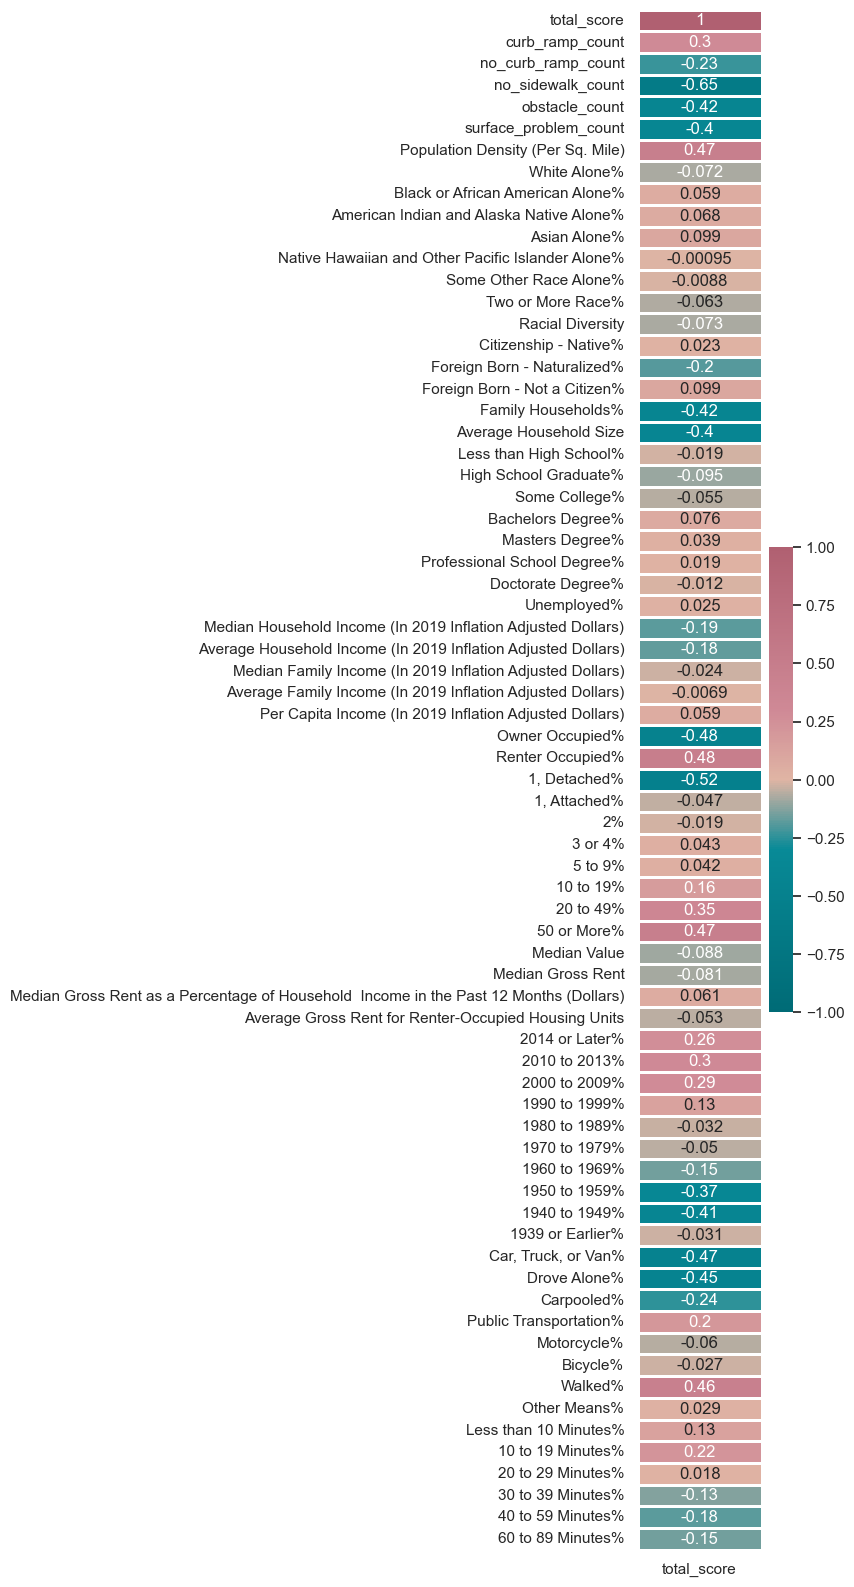

In [80]:
fig, axs = plt.subplots(figsize=(2,20))
heatmap = sns.heatmap(x, vmin=-1, vmax=1,annot=True, cmap=cmap, annot_kws={"size":12}, cbar_kws={"shrink":0.5},linewidth=2)
#heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 20)


In [113]:
#select the columns Population Density (Per Sq.Mile) Family Households%
df_1 = access_score_per_bg_grouped [['GEOID10','Population Density (Per Sq. Mile)', 'Per Capita Income (In 2019 Inflation Adjusted Dollars)','Median Gross Rent', 'Walked%', 'geometry']]
df_1

,GEOID10,Population Density (Per Sq. Mile),Per Capita Income (In 2019 Inflation Adjusted Dollars),Median Gross Rent,Walked%,geometry
0,530330001005,15089.69000,34484.00000,1539.00000,0.07497,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."
1,530330002002,6931.41600,29848.00000,1685.00000,0.06468,"POLYGON ((-122.29914 47.72473, -122.29912 47.7..."
2,530330004012,11124.90000,41348.00000,1553.00000,0.02497,"POLYGON ((-122.35555 47.72550, -122.35555 47.7..."
3,530330004023,11179.62000,52293.00000,1543.00000,0.03984,"POLYGON ((-122.35023 47.71415, -122.35021 47.7..."
4,530330004024,10552.88000,71687.00000,1432.00000,0.00000,"POLYGON ((-122.35029 47.71777, -122.35026 47.7..."
...,...,...,...,...,...,...
398,530330118003,8307.38100,37795.00000,NaN,0.00000,"POLYGON ((-122.26158 47.52026, -122.26160 47.5..."
399,530330118004,9969.82900,21370.00000,924.00000,0.00000,"POLYGON ((-122.27131 47.52613, -122.27015 47.5..."
400,530330118005,12379.68000,28757.00000,1618.00000,0.00000,"POLYGON ((-122.27177 47.52911, -122.27080 47.5..."
401,530330118006,13174.33000,19039.00000,1177.00000,0.03560,"POLYGON ((-122.26880 47.53166, -122.26817 47.5..."


In [115]:
#rename Population Density (Per Sq. Mile) to Population Density
df_1 = df_1.rename(columns={'Population Density (Per Sq. Mile)': 'Population Density', 'Per Capita Income (In 2019 Inflation Adjusted Dollars)' : 'Income Per Capita','Median Household Income (In 2019 Inflation Adjusted Dollars)':'Median Household Income'})
df_1.head(2)

,GEOID10,Population Density,Income Per Capita,Median Gross Rent,Walked%,geometry
0,530330001005,15089.69000,34484.00000,1539.00000,0.07497,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."
1,530330002002,6931.41600,29848.00000,1685.00000,0.06468,"POLYGON ((-122.29914 47.72473, -122.29912 47.7..."


In [117]:
#select the first 13 columns of df and make df_2
df_2 = access_score_per_bg_grouped.iloc[:, np.r_[0:12]]
df_2.head(2)

,GEOID10,total_score,surface_problem_avg_score,obstacle_avg_score,no_sidewalk_avg_score,no_curb_ramp_avg_score,curb_ramp_avg_score,surface_problem_count,obstacle_count,no_sidewalk_count,no_curb_ramp_count,curb_ramp_count
0,530330001005,-0.02500,0.00000,0.00000,0.00000,0.00000,-0.02500,0.00000,0.00000,0.00000,0.00000,5.00000
1,530330002002,-0.13571,-0.04286,0.00000,0.00000,-0.07143,-0.02143,1.00000,0.00000,0.00000,1.00000,7.00000


In [120]:
#merge df_1 and df_2 into df
df = pd.merge(df_2, df_1, on='GEOID10')
df.head(2)

,GEOID10,total_score,surface_problem_avg_score,obstacle_avg_score,no_sidewalk_avg_score,no_curb_ramp_avg_score,curb_ramp_avg_score,surface_problem_count,obstacle_count,no_sidewalk_count,no_curb_ramp_count,curb_ramp_count,Population Density,Income Per Capita,Median Gross Rent,Walked%,geometry
0,530330001005,-0.02500,0.00000,0.00000,0.00000,0.00000,-0.02500,0.00000,0.00000,0.00000,0.00000,5.00000,15089.69000,34484.00000,1539.00000,0.07497,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."
1,530330002002,-0.13571,-0.04286,0.00000,0.00000,-0.07143,-0.02143,1.00000,0.00000,0.00000,1.00000,7.00000,6931.41600,29848.00000,1685.00000,0.06468,"POLYGON ((-122.29914 47.72473, -122.29912 47.7..."


In [122]:
#make df into geodataframe and set geometry to geometry
df = gpd.GeoDataFrame(df, geometry='geometry')

In [34]:
#get the 8 quantiles for Population Density
population_breaks = df['Population Density'].quantile([0.125,0.25,0.375,0.5,0.625,0.75,0.875]).round(2).tolist()
population_breaks

[5416.37, 7659.98, 9605.29, 11027.85, 13136.9, 16722.01, 25974.15]

In [41]:
#get the 8 quantiles for Income Per Capita
income_breaks = df['Income Per Capita'].quantile([0.125,0.25,0.375,0.5,0.625,0.75,0.875]).round(2).tolist()
income_breaks

[33676.0, 44645.0, 53128.25, 60193.0, 66504.0, 75218.0, 87871.0]

In [45]:
# get the 8 quantiles for Median Gross Rent
rent_breaks = df['Median Gross Rent'].quantile([0.125,0.25,0.375,0.5,0.625,0.75,0.875]).round(2).tolist()
rent_breaks


[1249.38, 1438.25, 1568.12, 1677.0, 1761.25, 1867.75, 2193.38]

In [46]:
# get the 8 quantiles for Walked%
walked_breaks = df['Walked%'].quantile([0.125,0.25,0.375,0.5,0.625,0.75,0.875]).round(2).tolist()
walked_breaks


[0.0, 0.01, 0.02, 0.04, 0.07, 0.11, 0.29]

In [47]:
#get max for Walked%
df['Walked%'].max()

0.685459940652819

In [40]:
# put #f3e79b,#fac484,#f8a07e,#eb7f86,#ce6693,#a059a0,#5c53a5 into a color list
colors = ['#f3e79b','#fac484','#f8a07e','#eb7f86','#ce6693','#a059a0','#5c53a5']

# put #009392,#72aaa1,#b1c7b3,#f1eac8,#e5b9ad,#d98994,#d0587e into a color list
colors2 = ['#009392','#72aaa1','#b1c7b3','#f1eac8','#e5b9ad','#d98994','#d0587e']

# put #b0f2bc,#89e8ac,#67dba5,#4cc8a3,#38b2a3,#2c98a0,#257d98 into a color list
colors3 = ['#b0f2bc','#89e8ac','#67dba5','#4cc8a3','#38b2a3','#2c98a0','#257d98']


In [41]:
#put population_breaks and colors into a dictionary
population_color_dict = dict(zip(population_breaks, colors3))
population_color_dict

{5416.37: '#b0f2bc',
 7659.98: '#89e8ac',
 9605.29: '#67dba5',
 11027.85: '#4cc8a3',
 13136.9: '#38b2a3',
 16722.01: '#2c98a0',
 25974.15: '#257d98'}

In [123]:
#export to geojson
df.to_file('../../json-for-publishing/access-score/access-score-per-blockgroup.geojson', driver='GeoJSON')